In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import joblib

In [4]:
data= pd.read_csv('cropdata_updated.csv') # loading the data
data.head(3) # displaying the first 3 lines of the data set

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1


### data exprolation and cleaninng

In [5]:
data.info() # understanding the data type we are working with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crop ID         16411 non-null  object 
 1   soil_type       16411 non-null  object 
 2   Seedling Stage  16411 non-null  object 
 3   MOI             16411 non-null  int64  
 4   temp            16411 non-null  int64  
 5   humidity        16411 non-null  float64
 6   result          16411 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 897.6+ KB


In [6]:
data.shape

(16411, 7)

In [7]:
data.isnull().sum() # checking if there is any missing values

crop ID           0
soil_type         0
Seedling Stage    0
MOI               0
temp              0
humidity          0
result            0
dtype: int64

In [8]:
data.loc[data['result']==2].count(axis=0)

crop ID           1122
soil_type         1122
Seedling Stage    1122
MOI               1122
temp              1122
humidity          1122
result            1122
dtype: int64

In [9]:
data.duplicated().value_counts()

False    16283
True       128
Name: count, dtype: int64

In [10]:
cleaned_data=data[data['result']!=2 ] # cleaning data by removing all records that has the value of 2 while we expected to have 1 or 0

In [11]:
cleaned_data.drop_duplicates(inplace=True) # removing duplicated records

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_6340\4048420454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop_duplicates(inplace=True) # removing duplicated records


In [12]:
cleaned_data.shape

(15161, 7)

In [13]:
cleaned_data.result.value_counts() 

result
0    8934
1    6227
Name: count, dtype: int64

In [14]:
cleaned_data.describe(include='O') # data summary on categorical data

,crop ID,soil_type,Seedling Stage
count,15161,15161,15161
unique,5,7,8
top,Wheat,Clay Soil,Flowering
freq,5776,3403,2738


In [15]:
cleaned_data.describe() # statistical summary on numeric data type

,MOI,temp,humidity,result
count,15161.000000,15161.000000,15161.000000,15161.000000
mean,42.016688,28.431898,64.348354,0.410725
std,27.134370,9.729298,22.581638,0.491982
min,1.000000,13.000000,15.000000,0.000000
25%,19.000000,20.000000,45.000000,0.000000
50%,39.000000,28.000000,71.000000,0.000000
75%,61.000000,37.000000,84.000000,1.000000
max,100.000000,46.000000,91.000000,1.000000


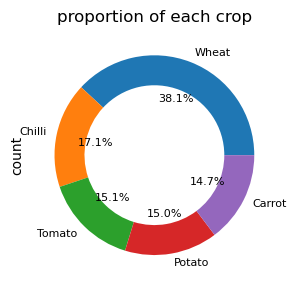

In [16]:
plt.figure(figsize=(4,3))
cleaned_data['crop ID'].value_counts().plot(kind='pie',fontsize=8,wedgeprops= dict(width=0.3), autopct= '%3.1f%%')
plt.title('proportion of each crop')
plt.tight_layout()
plt.show()

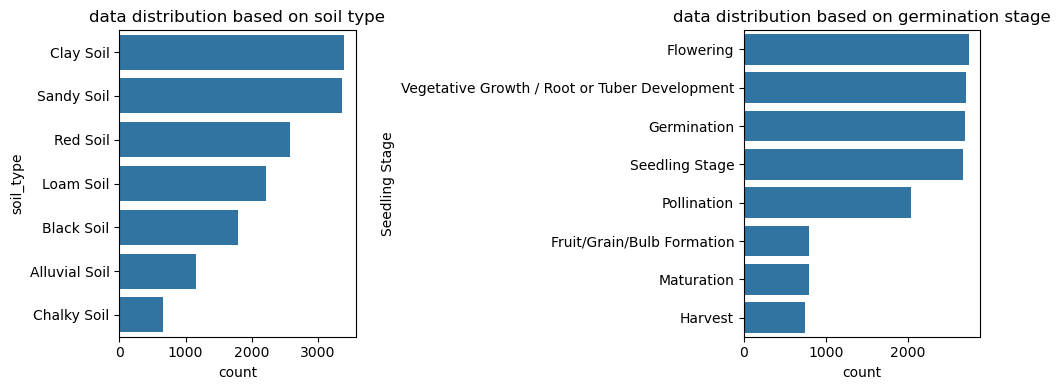

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(cleaned_data.soil_type.value_counts(),orient='h')
plt.title('data distribution based on soil type')

plt.subplot(1,2,2)
sns.barplot(cleaned_data['Seedling Stage'].value_counts(),orient='h')
plt.title('data distribution based on germination stage')

plt.tight_layout()
plt.show()

In [18]:
cleaned_data.corr(numeric_only=True) # checking the influence of independent variables on target variable (result)

,MOI,temp,humidity,result
MOI,1.000000,0.251069,-0.234508,-0.286134
temp,0.251069,1.000000,-0.976202,0.570059
humidity,-0.234508,-0.976202,1.000000,-0.527757
result,-0.286134,0.570059,-0.527757,1.000000


### building a machine learning model

In [19]:
x=cleaned_data.drop('result',axis=1)
y= cleaned_data['result']

In [20]:
# splitting data into training and testing set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [21]:
x_train.columns # displaying the column names

Index(['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity'], dtype='object')

In [22]:
categorical_cols= ['crop ID','soil_type','Seedling Stage']
numerical_cols= ['MOI','temp','humidity']

In [23]:
# Data preprocessing
preprocess= ColumnTransformer([('categorical',OneHotEncoder(drop='first'),categorical_cols),
                              ('numerical',StandardScaler(),numerical_cols)])

In [24]:
pipe=Pipeline([('preproces',preprocess),
              ('classifier',LogisticRegression(random_state=42))])

In [25]:
fitted_model=pipe.fit(x_train,y_train) # fitting the model

In [26]:
pred= pipe.predict(x_test) # predicting data using x test set
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Model evaluation

In [27]:
print("accuracy =", metrics.accuracy_score(y_test,pred)) 

accuracy = 0.888107276324467


In [28]:
print("classification report:")
print(metrics.classification_report(y_test,pred,target_names=['No',"Yes"]))

classification report:
              precision    recall  f1-score   support

          No       0.91      0.90      0.90      2681
         Yes       0.86      0.87      0.86      1868

    accuracy                           0.89      4549
   macro avg       0.88      0.89      0.88      4549
weighted avg       0.89      0.89      0.89      4549



In [29]:
print('confusion matrix')
confusion_matrix= pd.DataFrame(metrics.confusion_matrix(y_test,pred))
confusion_matrix

confusion matrix


,0,1
0,2417,264
1,245,1623


In [30]:
y_proba= pipe.predict_proba(x_test)[:,1]
fpr,tpr,threshold= metrics.roc_curve(y_test,y_proba)
auc_score= metrics.roc_auc_score(y_test,y_proba)

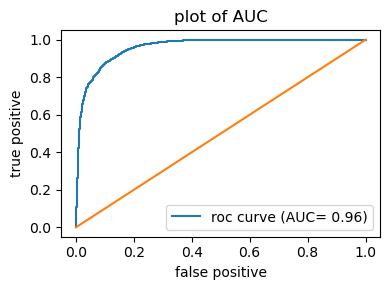

In [31]:
plt.figure(figsize=(4,3))
plt.plot(fpr,tpr,label=f'roc curve (AUC= {auc_score:.2f})')
plt.plot([0,1],[0,1])
plt.title('plot of AUC')
plt.ylabel('true positive')
plt.xlabel('false positive')
plt.tight_layout()
plt.legend()
plt.show()

### Saving the model and loading it for future use

In [36]:
#saving the model
joblib.dump(pipe,'irrigation_model')

['irrigation_model']

In [37]:
#loading the model
system= joblib.load('irrigation_model')

In [38]:
# testing our model on new data
new_data= pd.DataFrame( {'crop ID':'Chilli','soil_type':'Chalky Soil',
             'Seedling Stage':'Flowering','MOI':79,'temp':24,
             'humidity':80},index=[0])
system.predict(new_data)

array([0], dtype=int64)